# Importing the neccesary packages and libraries

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

# QUESTION 1

In [2]:
# data reading
EirGrid_data=pd.read_csv("EirGridSystemDemand2014.csv")
EirGrid_data

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0
...,...,...,...
35035,12/31/2014,22:45,2779.0
35036,12/31/2014,23:00,2876.0
35037,12/31/2014,23:15,2961.0
35038,12/31/2014,23:30,2957.0


In [3]:
# Checking the NaN values
EirGrid_data.isna().sum()

Date      0
Time      0
Demand    5
dtype: int64

In [4]:
# Note the null values 
NaN_values = EirGrid_data[EirGrid_data["Demand"].isnull()]
NaN_values

,Date,Time,Demand
8452,3/30/2014,1:00,NaN
8453,3/30/2014,1:15,NaN
8454,3/30/2014,1:30,NaN
8455,3/30/2014,1:45,NaN
21657,8/14/2014,14:15,NaN


In [5]:
# interoplation to fill in the non values
EirGrid_data["Demand"] = EirGrid_data["Demand"].interpolate(method = "linear", limit_direction ='forward')
EirGrid_data

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0
...,...,...,...
35035,12/31/2014,22:45,2779.0
35036,12/31/2014,23:00,2876.0
35037,12/31/2014,23:15,2961.0
35038,12/31/2014,23:30,2957.0


In [6]:
# Now the non values have been filled
EirGrid_data.isna().sum()

Date      0
Time      0
Demand    0
dtype: int64

In [7]:
# As the type of the date was object, we now change it into datetime format
EirGrid_data['Date']=pd.to_datetime(EirGrid_data['Date'])
EirGrid_data['Date'] = EirGrid_data['Date'].astype(str)

In [8]:
# We make the time in the hourly format
EirGrid_data["Time"] = [x + ':00' for x in EirGrid_data["Time"]]
EirGrid_data

,Date,Time,Demand
0,2014-01-01,0:00:00,2899.0
1,2014-01-01,0:15:00,2869.0
2,2014-01-01,0:30:00,2827.0
3,2014-01-01,0:45:00,2787.0
4,2014-01-01,1:00:00,2724.0
...,...,...,...
35035,2014-12-31,22:45:00,2779.0
35036,2014-12-31,23:00:00,2876.0
35037,2014-12-31,23:15:00,2961.0
35038,2014-12-31,23:30:00,2957.0


In [9]:
# From the EirGrid Date column we generate dates using datetime
dates = pd.to_datetime(EirGrid_data.Date, cache=True)
dates

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
35035   2014-12-31
35036   2014-12-31
35037   2014-12-31
35038   2014-12-31
35039   2014-12-31
Name: Date, Length: 35040, dtype: datetime64[ns]

In [10]:
# From the EirGrid Date column we generate time in hourly format using timedelta
times = pd.to_timedelta(EirGrid_data["Time"])
times 

0       0 days 00:00:00
1       0 days 00:15:00
2       0 days 00:30:00
3       0 days 00:45:00
4       0 days 01:00:00
              ...      
35035   0 days 22:45:00
35036   0 days 23:00:00
35037   0 days 23:15:00
35038   0 days 23:30:00
35039   0 days 23:45:00
Name: Time, Length: 35040, dtype: timedelta64[ns]

In [11]:
# now we concantenate dates with their respective times
EirGrid_data["dateTimes"]  = dates + times
EirGrid_data

,Date,Time,Demand,dateTimes
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00


In [12]:
# we change the datetimes object into datetimes
EirGrid_data["dateTimes"] = pd.to_datetime(EirGrid_data["dateTimes"])
EirGrid_data

,Date,Time,Demand,dateTimes
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00


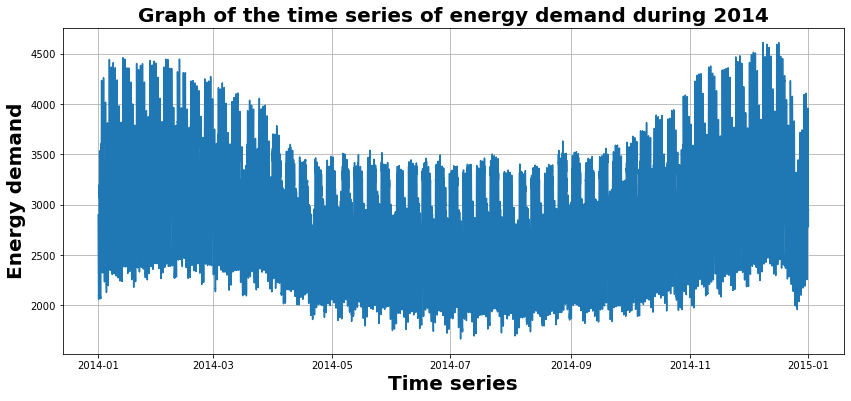

In [13]:
# Graphing the timeseries against the demand
# Figuring out the size of the plot
plt.figure (figsize=(14,6))
# plotting of the graph
plt.plot(EirGrid_data.dateTimes, EirGrid_data["Demand"])
# Adding the title to the graph
plt.title('Graph of the time series of energy demand during 2014',color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
#add gridlines and show the graphic
plt.grid()
plt.show() 

# QUESTION 2

In [14]:
# calculation of the autocorrelation coefficients
autocorrelation=sm.tsa.acf(EirGrid_data['Demand'],nlags=960)
autocorrelation
# Making the dataframe for the coefficients and assigning a proper name to it
autoCorrDf = pd.DataFrame(autocorrelation)
autoCorrDf.rename(columns={0: 'AutoCorrCoefficients'})

,AutoCorrCoefficients
0,1.000000
1,0.996103
2,0.985689
3,0.969448
4,0.948211
...,...
956,0.746984
957,0.764598
958,0.777886
959,0.786296


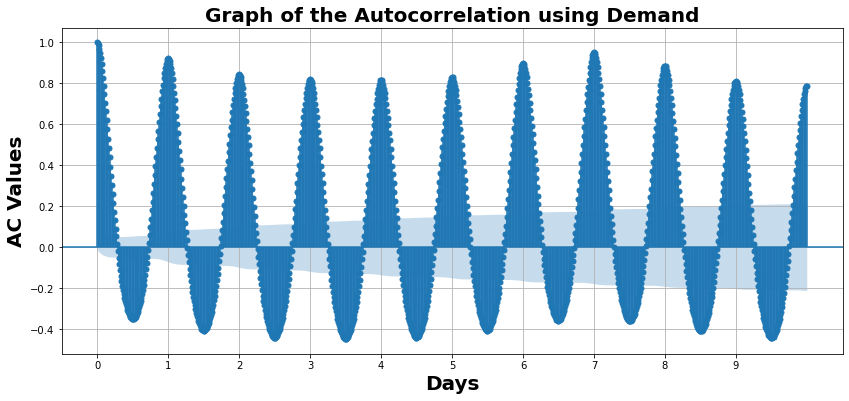

In [15]:
#figuring out the size of the graph
plt.rc("figure", figsize=(14,6))
#plotting of the acf
plot_acf(EirGrid_data["Demand"],lags=960)
#add title to the graph
plt.title('Graph of the Autocorrelation using Demand',color="black",fontsize=20,fontweight="bold")
#add labels for x and y
plt.xlabel('Days',color="black",fontsize=20,fontweight="bold")
plt.ylabel('AC Values',color="black",fontsize=20,fontweight="bold")
plt.xticks(np.arange(0,960,96),np.arange(10))
# add gridlines and showing the graph
plt.grid()
plt.show()

# QUESTION 3

In [16]:
# converting the date into numeric type
EirGrid_data["integer_Date"] = pd.to_numeric(EirGrid_data["dateTimes"], downcast="integer")
EirGrid_data

,Date,Time,Demand,dateTimes,integer_Date
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00,1388534400000000000
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00,1388535300000000000
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00,1388536200000000000
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00,1388537100000000000
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00,1388538000000000000
...,...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00,1420065900000000000
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00,1420066800000000000
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00,1420067700000000000
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00,1420068600000000000


In [17]:
# Assigning the existing date to the new scale 0-1
EirGrid_data["New_Scale"] = (EirGrid_data["integer_Date"] - EirGrid_data["integer_Date"].min())/ (EirGrid_data["integer_Date"].max() - EirGrid_data["integer_Date"].min())
EirGrid_data

,Date,Time,Demand,dateTimes,integer_Date,New_Scale
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00,1388534400000000000,0.000000
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00,1388535300000000000,0.000029
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00,1388536200000000000,0.000057
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00,1388537100000000000,0.000086
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00,1388538000000000000,0.000114
...,...,...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00,1420065900000000000,0.999886
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00,1420066800000000000,0.999914
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00,1420067700000000000,0.999943
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00,1420068600000000000,0.999971


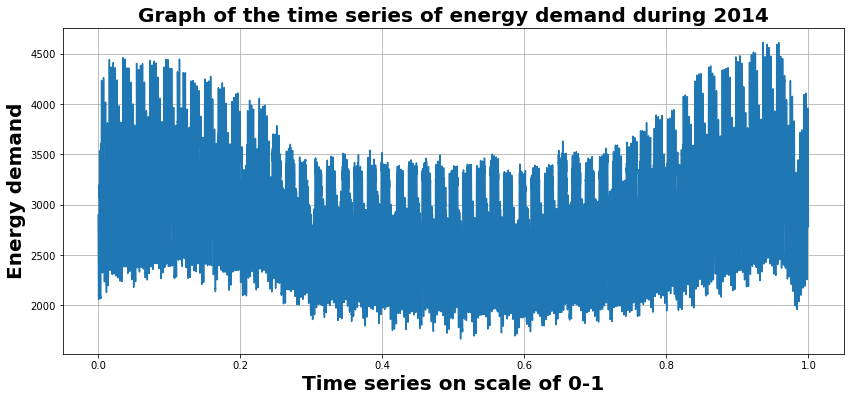

In [18]:
#figuring out the size of the graph
plt.rc("figure", figsize=(14,6))
# plotting the graphic of the new_scaled data versus the demand
plt.plot(EirGrid_data["New_Scale"], EirGrid_data["Demand"])
# Adding the title to the graph
plt.title('Graph of the time series of energy demand during 2014',color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Time series on scale of 0-1',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
#add gridlines and show the graphic
plt.grid()
plt.show()

# QUESTION 4

In [19]:
# we replaced the datetime index with the months using the code: .dt.month_name()
EirGrid_data['Months'] = EirGrid_data['dateTimes'].dt.month_name()
EirGrid_data

,Date,Time,Demand,dateTimes,integer_Date,New_Scale,Months
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00,1388534400000000000,0.000000,January
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00,1388535300000000000,0.000029,January
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00,1388536200000000000,0.000057,January
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00,1388537100000000000,0.000086,January
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00,1388538000000000000,0.000114,January
...,...,...,...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00,1420065900000000000,0.999886,December
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00,1420066800000000000,0.999914,December
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00,1420067700000000000,0.999943,December
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00,1420068600000000000,0.999971,December


In [20]:
#we use the groupby code to  groupby months and dot mean so that it calculates the mean for every month
EirGrid_data_monthly = EirGrid_data.groupby(pd.Grouper(key='Months', axis=0)).mean()
EirGrid_data_monthly

,Demand,integer_Date,New_Scale
Months,,,
January,3226.265793,1389873149999999232,0.042453
February,3247.410342,1392421949999998976,0.123277
March,3093.453629,1394970749999999232,0.204101
April,2844.273264,1397605949999998720,0.287665
May,2767.462030,1400241149999998976,0.371229
June,2695.365278,1402876349999998976,0.454793
July,2695.177083,1405511549999999232,0.538357
August,2681.552419,1408189949999999232,0.623291
September,2806.761111,1410825149999998976,0.706855


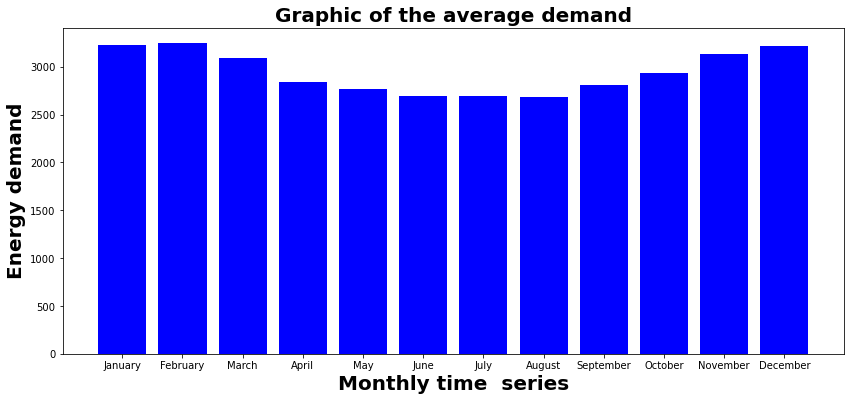

In [21]:
#figuring out the size of the graph
plt.rc("figure", figsize=(14,6))
# Graphic of the of monthly demand using the bar chart
plt.bar(EirGrid_data_monthly.index.values, EirGrid_data_monthly["Demand"], color = "blue")
# Adding the title to the graph
plt.title('Graphic of the average demand',color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Monthly time  series',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
#show the graphic
plt.show()

# QUESTION 5

In [22]:
#we use the groupby code to  groupby hours and dot mean so that it calculates the mean for every month
EirGrid_data_hourly = EirGrid_data.groupby(pd.Grouper(key='dateTimes', axis=0, freq='H')).mean()
#resetting of the index so that the datetimes becomes again the index
EirGrid_data_hourly = EirGrid_data_hourly.reset_index()
EirGrid_data_hourly

,dateTimes,Demand,integer_Date,New_Scale
0,2014-01-01 00:00:00,2845.50,1388535750000000000,0.000043
1,2014-01-01 01:00:00,2637.50,1388539350000000000,0.000157
2,2014-01-01 02:00:00,2413.50,1388542950000000000,0.000271
3,2014-01-01 03:00:00,2251.75,1388546550000000000,0.000385
4,2014-01-01 04:00:00,2132.50,1388550150000000000,0.000499
...,...,...,...,...
8755,2014-12-31 19:00:00,3638.00,1420053750000000000,0.999501
8756,2014-12-31 20:00:00,3367.00,1420057350000000000,0.999615
8757,2014-12-31 21:00:00,3063.25,1420060950000000000,0.999729
8758,2014-12-31 22:00:00,2831.50,1420064550000000000,0.999843


In [23]:
# the .dt.hour is used to access the values of the series as datetime as hours
EirGrid_data_hourly['hour'] = EirGrid_data_hourly['dateTimes'].dt.hour
EirGrid_data_hourly

,dateTimes,Demand,integer_Date,New_Scale,hour
0,2014-01-01 00:00:00,2845.50,1388535750000000000,0.000043,0
1,2014-01-01 01:00:00,2637.50,1388539350000000000,0.000157,1
2,2014-01-01 02:00:00,2413.50,1388542950000000000,0.000271,2
3,2014-01-01 03:00:00,2251.75,1388546550000000000,0.000385,3
4,2014-01-01 04:00:00,2132.50,1388550150000000000,0.000499,4
...,...,...,...,...,...
8755,2014-12-31 19:00:00,3638.00,1420053750000000000,0.999501,19
8756,2014-12-31 20:00:00,3367.00,1420057350000000000,0.999615,20
8757,2014-12-31 21:00:00,3063.25,1420060950000000000,0.999729,21
8758,2014-12-31 22:00:00,2831.50,1420064550000000000,0.999843,22


In [24]:
# we chane the hour format to display hour, minutes and seconds
EirGrid_data_hourly['hour'] = EirGrid_data_hourly['dateTimes'].values.astype('<M8[h]')
EirGrid_data_hourly

,dateTimes,Demand,integer_Date,New_Scale,hour
0,2014-01-01 00:00:00,2845.50,1388535750000000000,0.000043,2014-01-01 00:00:00
1,2014-01-01 01:00:00,2637.50,1388539350000000000,0.000157,2014-01-01 01:00:00
2,2014-01-01 02:00:00,2413.50,1388542950000000000,0.000271,2014-01-01 02:00:00
3,2014-01-01 03:00:00,2251.75,1388546550000000000,0.000385,2014-01-01 03:00:00
4,2014-01-01 04:00:00,2132.50,1388550150000000000,0.000499,2014-01-01 04:00:00
...,...,...,...,...,...
8755,2014-12-31 19:00:00,3638.00,1420053750000000000,0.999501,2014-12-31 19:00:00
8756,2014-12-31 20:00:00,3367.00,1420057350000000000,0.999615,2014-12-31 20:00:00
8757,2014-12-31 21:00:00,3063.25,1420060950000000000,0.999729,2014-12-31 21:00:00
8758,2014-12-31 22:00:00,2831.50,1420064550000000000,0.999843,2014-12-31 22:00:00


In [25]:
# We find the mean value for every hour
EirGrid_data_hourly_Mean = EirGrid_data_hourly.groupby(pd.Grouper(key='hour', axis=0)).mean()
EirGrid_data_hourly_Mean

,Demand,integer_Date,New_Scale
hour,,,
2014-01-01 00:00:00,2845.50,1388535750000000000,0.000043
2014-01-01 01:00:00,2637.50,1388539350000000000,0.000157
2014-01-01 02:00:00,2413.50,1388542950000000000,0.000271
2014-01-01 03:00:00,2251.75,1388546550000000000,0.000385
2014-01-01 04:00:00,2132.50,1388550150000000000,0.000499
...,...,...,...
2014-12-31 19:00:00,3638.00,1420053750000000000,0.999501
2014-12-31 20:00:00,3367.00,1420057350000000000,0.999615
2014-12-31 21:00:00,3063.25,1420060950000000000,0.999729


In [26]:
# we reset again the index
EirGrid_data_hourly_Mean = EirGrid_data_hourly_Mean.reset_index()
EirGrid_data_hourly_Mean

,hour,Demand,integer_Date,New_Scale
0,2014-01-01 00:00:00,2845.50,1388535750000000000,0.000043
1,2014-01-01 01:00:00,2637.50,1388539350000000000,0.000157
2,2014-01-01 02:00:00,2413.50,1388542950000000000,0.000271
3,2014-01-01 03:00:00,2251.75,1388546550000000000,0.000385
4,2014-01-01 04:00:00,2132.50,1388550150000000000,0.000499
...,...,...,...,...
8755,2014-12-31 19:00:00,3638.00,1420053750000000000,0.999501
8756,2014-12-31 20:00:00,3367.00,1420057350000000000,0.999615
8757,2014-12-31 21:00:00,3063.25,1420060950000000000,0.999729
8758,2014-12-31 22:00:00,2831.50,1420064550000000000,0.999843


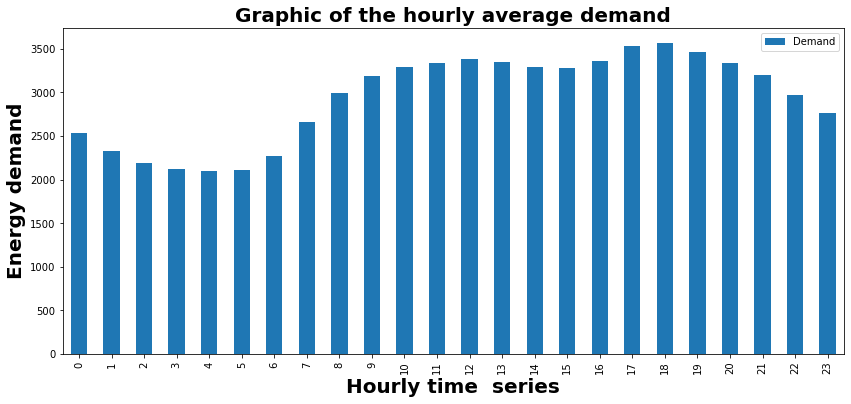

In [27]:
EirGrid_data_hourly_Mean=EirGrid_data_hourly_Mean.set_index(EirGrid_data_hourly_Mean['hour'])
new_df=EirGrid_data_hourly_Mean[['Demand']].groupby(EirGrid_data_hourly_Mean.index.hour).mean()
new_df.plot.bar()
# Adding the title to the graph
plt.title('Graphic of the hourly average demand',color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Hourly time  series',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
#show the graphic
plt.show()

# QUESTION 6

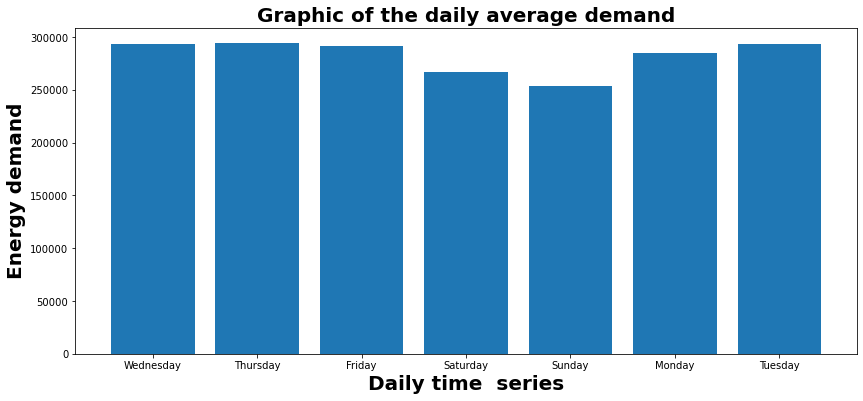

In [28]:
#we use the groupby code to  groupby the dateTimes
EirGrid_data_daily = EirGrid_data.groupby(pd.Grouper(key='dateTimes', axis=0, freq='D')).sum()
# resetting of the index
EirGrid_data_daily = EirGrid_data_daily.reset_index()
# the .dt.day_name is used to access the values of the series as datetime as days
EirGrid_data_daily['Days'] = EirGrid_data_daily['dateTimes'].dt.day_name()
# finding out the mean
EirGrid_data_daily_Mean = EirGrid_data_daily.groupby(pd.Grouper(key='Days', axis=0)).mean()
EirGrid_data_daily_Mean
#figuring out the size of the plot
plt.rc("figure", figsize=(14,6))
#plotting of the daily average demand
plt.bar(EirGrid_data_daily_Mean.index.values, EirGrid_data_daily_Mean["Demand"])
# Adding the title to the graph
plt.title('Graphic of the daily average demand',color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Daily time  series',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
#show the graphic
plt.show()

# QUESTION 7

In [29]:
# preparation of the existing dataframe to remain the needed features
EirGrid_data1=EirGrid_data.iloc[:,:4]
EirGrid_data1

,Date,Time,Demand,dateTimes
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00


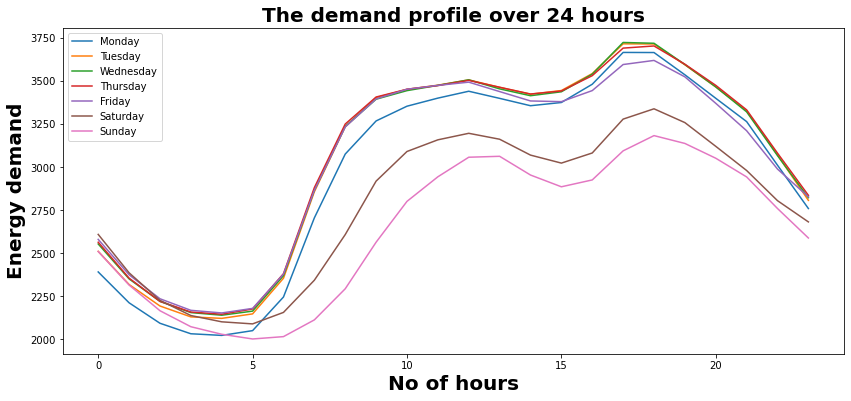

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
dateTimes,,,,,,,
0,2391.326923,2510.788462,2553.466981,2563.740385,2580.211538,2609.100962,2509.822115
1,2212.317308,2318.504808,2351.047170,2355.471154,2375.052885,2386.254808,2315.302885
2,2093.615385,2193.745192,2220.330189,2220.687500,2235.759615,2226.533654,2166.370192
3,2032.706731,2130.639423,2155.500000,2158.735577,2168.706731,2138.514423,2073.586538
4,2023.168269,2121.923077,2140.292453,2146.048077,2153.413462,2101.947115,2029.841346
5,2050.812500,2148.014423,2164.051887,2176.403846,2179.826923,2089.961538,2002.461538
6,2245.923077,2354.802885,2369.641509,2380.985577,2378.764423,2156.581731,2016.076923
7,2704.875000,2856.302885,2865.608491,2880.221154,2865.163462,2343.307692,2113.182692
8,3075.024038,3233.456731,3235.207547,3249.216346,3232.235577,2607.961538,2293.625000


In [30]:
# calculation of the daily demand profile for each day of the week
daily_profile = EirGrid_data1.groupby([pd.to_datetime(EirGrid_data1["dateTimes"]).dt.hour,pd.to_datetime(EirGrid_data1['Date']).dt.weekday]).mean().unstack()
#assigning the names to the columns
daily_profile.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_profile
# plotting of daily demand profile for each day of the week
daily_profile.plot()
#adding the title
plt.title("The demand profile over 24 hours",color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('No of hours',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy demand',color="black",fontsize=20,fontweight="bold")
# showing of the graphic
plt.show()

# the daily load profile
daily_profile

# QUESTION 8

In [31]:
# we use the following dataframe
EirGrid_data1

,Date,Time,Demand,dateTimes
0,2014-01-01,0:00:00,2899.0,2014-01-01 00:00:00
1,2014-01-01,0:15:00,2869.0,2014-01-01 00:15:00
2,2014-01-01,0:30:00,2827.0,2014-01-01 00:30:00
3,2014-01-01,0:45:00,2787.0,2014-01-01 00:45:00
4,2014-01-01,1:00:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,2014-12-31,22:45:00,2779.0,2014-12-31 22:45:00
35036,2014-12-31,23:00:00,2876.0,2014-12-31 23:00:00
35037,2014-12-31,23:15:00,2961.0,2014-12-31 23:15:00
35038,2014-12-31,23:30:00,2957.0,2014-12-31 23:30:00


In [32]:
# we extract the needed featutres from the dataframe
EirGrid_dat2 = EirGrid_data1. iloc[:, [2,3]].set_index("dateTimes")
EirGrid_dat2
# adding the days of the week on the dataframe
EirGrid_dat2['days_of_the_week'] = EirGrid_dat2.index.weekday
EirGrid_dat2

,Demand,days_of_the_week
dateTimes,,
2014-01-01 00:00:00,2899.0,2
2014-01-01 00:15:00,2869.0,2
2014-01-01 00:30:00,2827.0,2
2014-01-01 00:45:00,2787.0,2
2014-01-01 01:00:00,2724.0,2
...,...,...
2014-12-31 22:45:00,2779.0,2
2014-12-31 23:00:00,2876.0,2
2014-12-31 23:15:00,2961.0,2


In [33]:
# finding out the working days of the week
days_of_the_week = EirGrid_dat2[EirGrid_dat2['days_of_the_week']< 5]
days_of_the_week['days_of_the_week'].unique()

array([2, 3, 4, 0, 1], dtype=int64)

In [34]:
# finding out the weekends from the 7 days of the week
weekend_days = EirGrid_dat2[EirGrid_dat2['days_of_the_week']>= 5]
weekend_days

,Demand,days_of_the_week
dateTimes,,
2014-01-04 00:00:00,3051.0,5
2014-01-04 00:15:00,2985.0,5
2014-01-04 00:30:00,2897.0,5
2014-01-04 00:45:00,2815.0,5
2014-01-04 01:00:00,2743.0,5
...,...,...
2014-12-28 22:45:00,2996.0,6
2014-12-28 23:00:00,3013.0,6
2014-12-28 23:15:00,3083.0,6


In [35]:
# finding of the t-statistics and the p-value
t_statistics,p_value=ttest_ind(days_of_the_week.Demand,weekend_days.Demand,equal_var=False)
print("The p-value is :",p_value)

The p-value is : 0.0


In [36]:
print("The t-statistics is:",t_statistics)

The t-statistics is: 51.363399969318884


# QUESTION 9

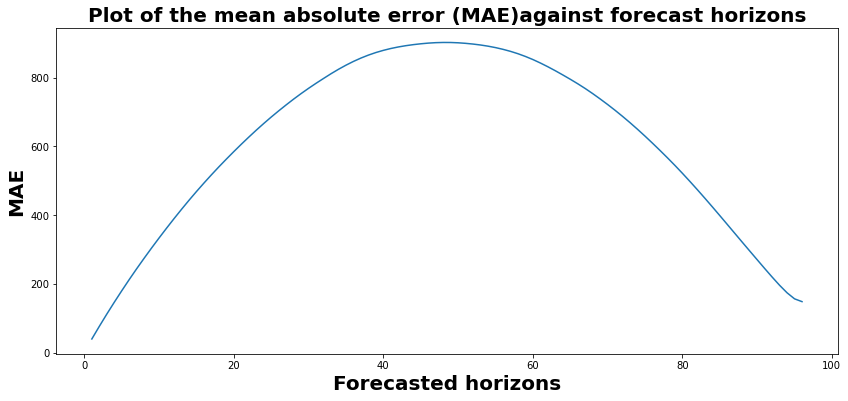

In [37]:
# the first half is divided
first_half = EirGrid_dat2.iloc[0:int(len(EirGrid_dat2)/2)]
first_half
#the second half is diveded
Second_half = EirGrid_dat2.iloc[int(len(EirGrid_dat2)/2):]
Second_half
# create the MAE list for storing the MAE values that are going to be calculated
MAE = []
#create the forecast_horizons list for storing the forecast_horizons values that are going to be calculated
forecast_horizons = []

# we calculated the halves for the shifted values
for i in range(1,97):
    shifted_data=EirGrid_dat2["Demand"].shift(i)
    shifted_data
    pd.DataFrame(shifted_data)

    first_half = shifted_data.iloc[0:int(len(shifted_data)/2)]
    first_half

    second_half = shifted_data.iloc[int(len(shifted_data)/2):]

    # Calculation of the MAE
    MAE.append(mae(Second_half.Demand,second_half.values))
    
    # calculation of the forecasted horizons
    forecast_horizons.append(i)
    
# plotting of the mean absolute error (MAE)against forecast horizons for lead times up to one day ahead.
plt.plot(forecast_horizons,MAE)

#adding the title
plt.title("Plot of the mean absolute error (MAE)against forecast horizons",color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Forecasted horizons',color="black",fontsize=20,fontweight="bold")
plt.ylabel('MAE',color="black",fontsize=20,fontweight="bold")
# showing of the graphic
plt.show()


# QUESTION 10

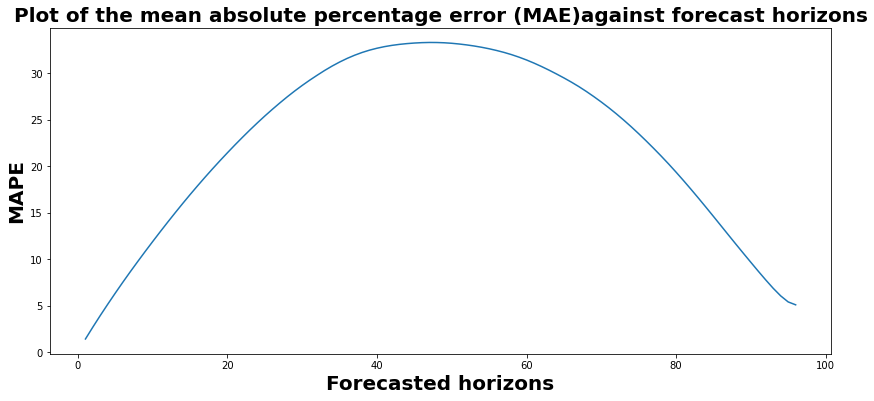

In [38]:
first_half = EirGrid_dat2.iloc[0:int(len(EirGrid_dat2)/2)]
first_half

Second_half = EirGrid_dat2.iloc[int(len(EirGrid_dat2)/2):]
Second_half
# create the MAPE list for storing the MAE values that are going to be calculated
MAPE = []
#create the forecast_horizon list for storing the forecast_horizons values that are going to be calculated
forecasted_horizons = []
for i in range(1,97):
    shifted_data=EirGrid_dat2["Demand"].shift(i)
    shifted_data
    pd.DataFrame(shifted_data)

    first_half = shifted_data.iloc[0:int(len(shifted_data)/2)]
    first_half

    second_half = shifted_data.iloc[int(len(shifted_data)/2):]

    # Calculation of the MAPE
    MAPE.append(100*(mape(Second_half.Demand,second_half.values)))
    # calculation of the forecasted horizons
    forecasted_horizons.append(i)
    
#plotting of the mean absolute percentage error (MAPE)against forecast horizons for lead times up to one day ahead.    
plt.plot(forecasted_horizons,MAPE);
#adding the title
plt.title("Plot of the mean absolute percentage error (MAE)against forecast horizons",color="black",fontsize=20,fontweight="bold")
#adding x and y labels to the graphic
plt.xlabel('Forecasted horizons',color="black",fontsize=20,fontweight="bold")
plt.ylabel('MAPE',color="black",fontsize=20,fontweight="bold")
# showing of the graphic
plt.show()